# Лабораторна робота 1

## Виконано студенкою групи АнД-41
## Бовсуновською Марією

## Завдання

1. Налаштувати робоче оточення
2. NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.
3. Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))
4. Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)
5. Sklearn (провести вирішення задачі регресії та класифікації)
6. Tensorflow (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними, reshape, інтеграцію з np.array, pd.DataFrame)
7. Відповіді оформити .ipynb документами за кожним з попередніх пунктів
8. Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де мають бути .ipynb файл та необхідні файли з даними

## Завдання 1

Налаштувати робоче середовище. 
Перенаштувалася на роботу у Jupyter Notebook у VSCode. Раніше працювала із кожним середовищем, але окремо.
Як завжди - година часу на те, щоб зрозуміти, чому бібліотеки не працюють, так, як працювали просто при відкритті Юпітера в браузері. У мене було встановлено окрім анаконди ще одне середовище із своїм набором бібліотек.  В правому верхньому кутку має бути вказано як середовище наведене нижче, щоб у ньому були необхідні бібліотеки.

Python 3.7.4 64-bit ('base':conda)

Окрім того було перекопано группа папок із дозволом адміністратора, що не дозволяв керувати версіями певних бібліотек.

Також тут буду імпортувати усі необхідні бібліотеки, щоб не губити їх по коду.

In [141]:
import numpy as np
import random as rd
np.random.seed(0)
rd.seed(0)

from sklearn.datasets import load_iris
raw_iris=load_iris()
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import sklearn.metrics as metr
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
tf.random.set_seed(0)
seed=0


## Завдання 2

NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.

In [61]:
print("---Скаляр------------------------------------------------------------")
z2A=5
print(z2A, ", isscalar: ",np.isscalar(z2A))
z2A+=3
print(z2A)
z2A=np.NaN
print(z2A)
# del z2A #Повністю видаляє змінну
# print(z2A)

print("---Вектор------------------------------------------------------------")
z2B=np.arange(1,10,1)
print(z2B)
z2B[1]+=108
print(z2B)
z2B=np.delete(z2B, 1)
print(z2B)


print("---Матриця------------------------------------------------------------")
z2C=np.random.randint(1, 10, (3, 4))
print(z2C)
z2C[1][1]+=108
print(z2C)
z2C=z2C.astype('float')
z2C[1][1]=np.NaN
print(z2C)


---Скаляр------------------------------------------------------------
5 , isscalar:  True
8
nan
---Вектор------------------------------------------------------------
[1 2 3 4 5 6 7 8 9]
[  1 110   3   4   5   6   7   8   9]
[1 3 4 5 6 7 8 9]
---Матриця------------------------------------------------------------
[[6 1 4 4]
 [8 4 6 3]
 [5 8 7 9]]
[[  6   1   4   4]
 [  8 112   6   3]
 [  5   8   7   9]]
[[ 6.  1.  4.  4.]
 [ 8. nan  6.  3.]
 [ 5.  8.  7.  9.]]


## Завдання 3

Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))


In [62]:
print("---Створення різними способами + head()------------------------------------------------------------")
print("створення за допомогою вивантаження з csv:")
z3dataA = pd.read_csv("z3data.csv", sep = ";", header = None , index_col=False)
print(z3dataA.head())

print("створення за допомогою перетворення завантаженного датасету iris із sklearn:")
z3dataB = pd.DataFrame(raw_iris.data, columns=raw_iris.feature_names)
print(z3dataB.head())

print("створення вручну")
z3dataC=pd.DataFrame({
    'a': ['xxxxx', 'yyyyy', 'zz', 'wwww'],
    'b': [7.4, 1, 0.005, 0],
    'c': [999, 44444, 11, 77777]
}, index=['aaa', 'hidden', 'ccc', 'ddd'])
print(z3dataC.head())

print("створення серії")
z3ser=pd.Series([1, 2, 3, 3, 4, 4, 4, 5])
print(z3ser.describe())


# !pip install --upgrade pandas==0.24.2
# !pip install --upgrade numpy==1.16.5
# print(np.__version__)
# print(pd.__version__)
# Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
print("----------------------------------------------")
print(".describe() було неймовірно важко застосувати через те, що найновіші версії numpy та pandas конфліктували між собою, не даючи можливості застосувати цю функцію. \n Довелося відкатити версії на pandas=0.24.2 numpy=1.16.5")  
print(z3dataB.describe())

print("----------------------------------------------")
print("loc - рядок за назвою:")
print(z3dataC.loc['hidden'])
print("iloc - рядок за індексом:")
print(z3dataC.iloc[1])
print("шматочок матриці за умовами:")
print(z3dataC.loc[["aaa", "ddd"],'a'] )

---Створення різними способами + head()------------------------------------------------------------
створення за допомогою вивантаження з csv:
   0  1  2
0  8  2  2
1  3  3  2
2  1  6  4
3  3  2  4
4  2  5  2
створення за допомогою перетворення завантаженного датасету iris із sklearn:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
створення вручну
            a      b      c
aaa     xxxxx  7.400    999
hidden  yyyyy  1.000  44444
ccc        zz  0.005     11
ddd      wwww  0.000  77777
створення серії
count    8.00000
mean     3.25000
std      1.28174
min      1.00000
25%      2.75000


## Завдання 4, 5

Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)
Sklearn (провести вирішення задачі регресії та класифікації)

MAE: 0.5646
MSE: 0.3822
     X        Y   Y_hat     mAE     mSE
0  0.0   0.9565   0.355  0.0602  0.0362
1  1.0   3.3289   2.455  0.0874  0.0764
2  2.0   3.6006   4.555  0.0954  0.0911
3  3.0   6.5062   6.655  0.0149  0.0022
4  4.0   7.9580   8.755  0.0797  0.0635
5  5.0  10.3748  10.855  0.0480  0.0231
6  6.0  12.3967  12.955  0.0558  0.0312
7  7.0  15.3489  15.055  0.0294  0.0086
8  8.0  16.8556  17.155  0.0299  0.0090
9  9.0  18.6156  19.255  0.0639  0.0409


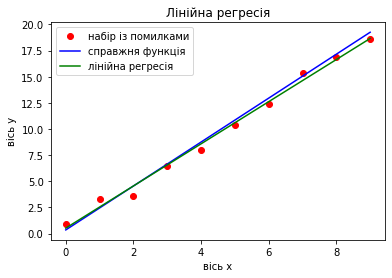

In [115]:
# y=ax+b
z4a=2.1
z4b=0.355
z4x=np.arange(0.0,10,1)
z4size=len(z4x)
z4y=np.zeros(z4size)
z4y_hat=np.zeros(z4size)
z4mae=np.zeros(z4size)
z4mse=np.zeros(z4size)
z4res_mae_hat=0
z4res_mse_hat=0

for i in range(z4size):
    z4y_hat[i]+=z4a*z4x[i]+z4b
    z4y[i]+=z4y_hat[i]+float('{:,.4f}'.format(rd.uniform(-1,1) ))

    z4mae[i]=float('{:,.4f}'.format(1.0/z4size*np.abs(z4y_hat[i]-z4y[i]) ))
    z4mse[i]=float('{:,.4f}'.format(1.0/z4size*(z4y_hat[i]-z4y[i])*(z4y_hat[i]-z4y[i]) ))
    z4res_mae_hat+=z4mae[i]
    z4res_mse_hat+=z4mse[i]

# print(z4x)
# print(z4y)
# print(z4y_hat)

plt.plot(z4x, z4y, 'ro' , label='набір із помилками')
plt.plot(z4x, z4y_hat, color='blue', label="справжня функція")

# z4res_mae=metr.mean_absolute_error(z4y_hat, z4y)
# z4res_mse=metr.mean_squared_error(z4y_hat, z4y)
# print(z4res_mae)
# print(z4res_mse)
print("MAE:", z4res_mae_hat)
print("MSE:", z4res_mse_hat)

z4title=np.array(("X","Y", "Y_hat", "mAE", "mSE"))
z4res=np.hstack((z4x[:,np.newaxis], np.hstack((z4y[:,np.newaxis], np.hstack((z4y_hat[:,np.newaxis], np.hstack((z4mae[:,np.newaxis],  z4mse[:,np.newaxis] )) )) )) ))
z4res=pd.DataFrame(data=z4res,columns=z4title)

print(z4res)

z4res.to_csv('z4res.csv', index=False, sep=';')



z5regr=LinearRegression()
z5regr.fit(z4x[:,np.newaxis], z4y[:,np.newaxis])
z5y_hat=z5regr.predict(z4x[:,np.newaxis])
plt.plot(z4x, z5y_hat, color='green', linestyle='-', label='лінійна регресія')

plt.title('Лінійна регресія')
plt.xlabel('вісь x')
plt.ylabel('вісь y')
plt.legend()
plt.show()



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Розраховано, що це квітка виду Setosa


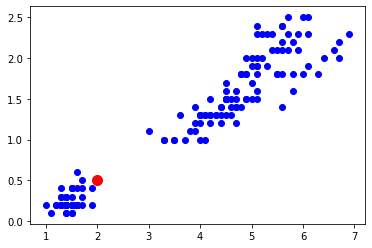

In [129]:

z5data=pd.DataFrame(pd.read_csv(r'iris.csv', delimiter = ','))
print(z5data.head())

z5x = z5data.iloc[:, :-1]
z5y = z5data.iloc[:, 4]

knn = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
knn.fit(z5x, z5y)
z5x_pred=[[5, 4, 2, 0.5]]
z5predict=knn.predict(z5x_pred)

print('\nРозраховано, що це квітка виду',  "".join(z5predict))
plt.scatter(z5x.loc[:,'petal.length'], z5x.loc[:,'petal.width'], c='b')
plt.scatter(z5x_pred[0][2], z5x_pred[0][3], c='r', s=100)

plt.show()

## Завдання 6

Tensorflow (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними, reshape, інтеграцію з np.array, pd.DataFrame)


In [153]:
z6A=tf.Variable(tf.random.uniform(shape=(3,4),minval=0,maxval=9, seed=seed))
print(z6A)
z6A[1,1].assign(-5)
print(z6A)
z6A[1,1].assign(np.nan)
print(z6A)

print("---інше----------------------------------------------")
z6A=tf.reshape(z6A, (2,6))
print(z6A, "\n")
z6A=tf.reshape(z6A, (3,4))
z6Anp=z6A.numpy()
print(z6Anp, "\n")
z6Apd=pd.DataFrame(z6A)
print(z6Apd)


<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1.0809774, 3.0402453, 2.3845417, 4.368325 ],
       [7.508193 , 3.5722423, 8.217646 , 7.2899885],
       [8.1510515, 4.3131046, 3.5559654, 7.9788775]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[ 1.0809774,  3.0402453,  2.3845417,  4.368325 ],
       [ 7.508193 , -5.       ,  8.217646 ,  7.2899885],
       [ 8.1510515,  4.3131046,  3.5559654,  7.9788775]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1.0809774, 3.0402453, 2.3845417, 4.368325 ],
       [7.508193 ,       nan, 8.217646 , 7.2899885],
       [8.1510515, 4.3131046, 3.5559654, 7.9788775]], dtype=float32)>
---інше----------------------------------------------
tf.Tensor(
[[1.0809774 3.0402453 2.3845417 4.368325  7.508193        nan]
 [8.217646  7.2899885 8.1510515 4.3131046 3.5559654 7.9788775]], shape=(2, 6), dtype=float32) 

[[1.0809774 3.0402453 2.3845417 4.368325 ]
 [7.508193

## Завдання 7, 8

Відповіді оформити .ipynb документами за кожним з попередніх пунктів
Викласти у зазначений репозіторій GitHub в окремій папці з назвою Lab1 де мають бути .ipynb файл та необхідні файли з даними